# European Data Science Job Market 2023: Executive Overview

This notebook provides an executive overview of the European data science job market in 2023. It covers job role segmentation, geographic distribution, employer trends, compensation patterns, and specific insights into Data Scientist roles. Our goal is to offer stakeholders a comprehensive view of the market’s dynamics and emerging trends.

## Chapter 1: Environment Setup and Data Acquisition

In this chapter, we configure our environment and load the European job market dataset.

In [3]:
# Import necessary libraries and helper functions
from helper_scripts.prepare_dataframe import get_european_dataframe
from helper_scripts.plots import plot_bar, plot_pie_charts
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration: parameters for filtering and visualization
TOP_N = 20      # Number of top entries to display for categorical analyses
TOP_JOB_ROLES = 10   # Number of top job roles to be considered

# Load the comprehensive European job market data
europe_jobs_df = get_european_dataframe()

With a solid data foundation and proper environment setup, we prepare to dive into the insights gleaned from this dataset.

## Chapter 2: Market Segmentation by Data Role

This section examines the distribution of job offers by data role—a key indicator of market demand.

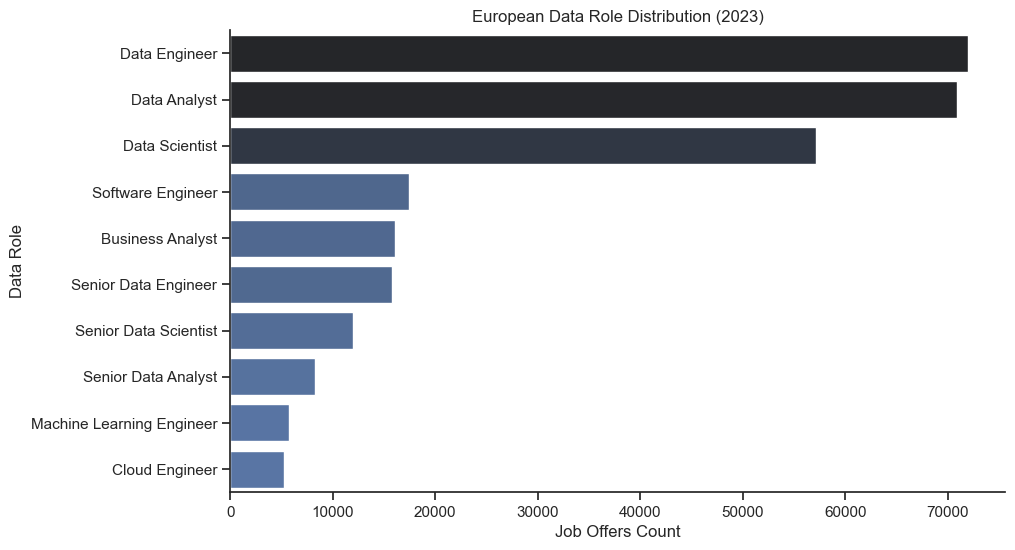

In [4]:
# Compute and visualize the counts of job offers for each data role
job_title_counts_df = europe_jobs_df["job_title_short"].value_counts().reset_index()
job_title_counts_df.columns = ["job_title", "offer_count"]

plot_bar(
    job_title_counts_df,
    x_col="offer_count",
    y_col="job_title",
    title="European Data Role Distribution (2023)",
    xlabel="Job Offers Count",
    ylabel="Data Role"
)

**Insights:**  
- **Strong demand for data professionals:** The market demonstrates robust demand, with *Data Engineers* topping the list (over 72,000 positions), and significant numbers for *Data Analysts* and *Data Scientists*. This indicates a clear need for professionals who excel in both technical and analytical domains.  
- **Opportunities for growth and specialization:** Entry-level and mid-level roles dominate, while fewer senior positions suggest companies are investing in developing talent. The emergence of niche roles such as *Machine Learning* and *Cloud Engineering* highlights new career pathways.

## Chapter 3: Geographic Distribution of Opportunities

In this section, we analyze how job opportunities are distributed across European countries, revealing regional market maturity and hotspots.

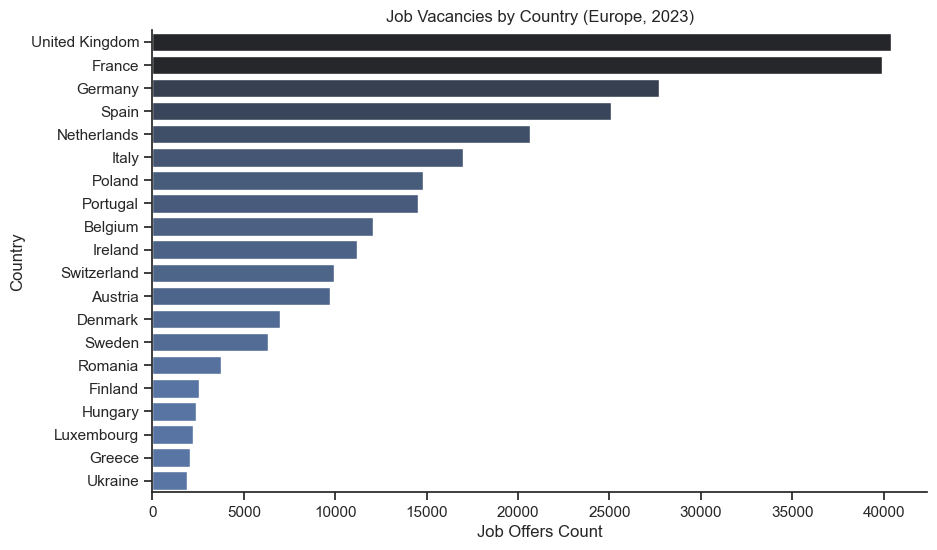

In [5]:
# Extract the top European countries by the number of job listings
country_offer_counts_df = europe_jobs_df["job_country"].value_counts().head(TOP_N).reset_index()
country_offer_counts_df.columns = ["country", "offer_count"]

plot_bar(
    country_offer_counts_df,
    x_col="offer_count",
    y_col="country",
    title="Job Vacancies by Country (Europe, 2023)",
    xlabel="Job Offers Count",
    ylabel="Country"
)

**Insights:**  
- **Geographic hotspots of opportunity:** The United Kingdom and France lead with over 40,000 positions each, followed by Germany and Spain.  
- **Varied market maturity:** Countries like the Netherlands, Italy, and Poland show mature job markets, while regions such as Greece and Ukraine, with fewer listings, indicate emerging opportunities.

## Chapter 4: Company-Level Hiring Trends

This chapter explores which companies and recruitment channels are actively posting job listings in the data sector.

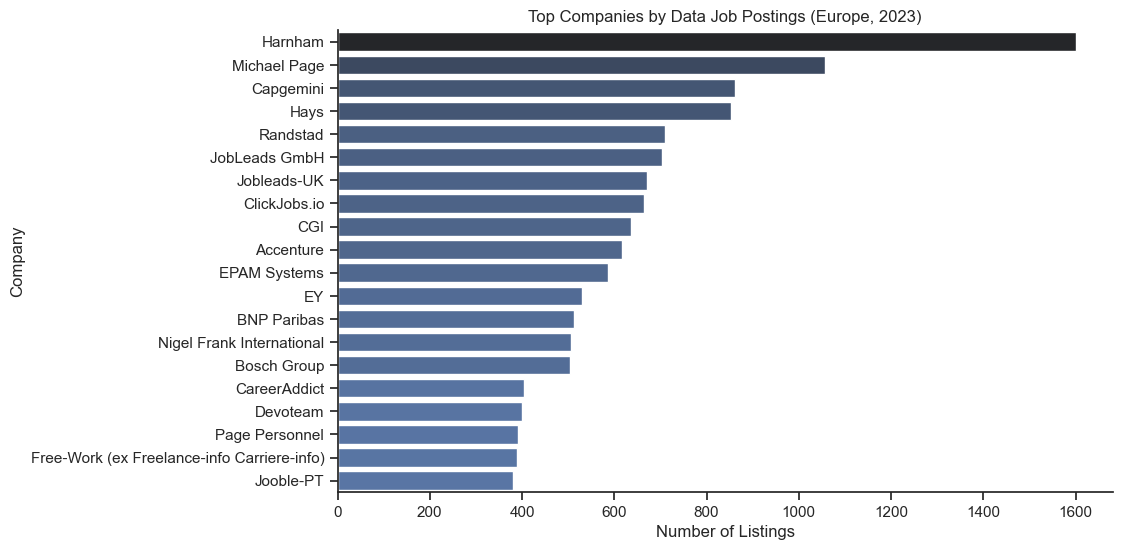

In [6]:
# Identify top companies by job postings, excluding any potential outliers
company_offer_counts_df = (
    europe_jobs_df["company_name"].value_counts().iloc[1: TOP_N + 1].reset_index()
)
company_offer_counts_df.columns = ["company", "offer_count"]

plot_bar(
    company_offer_counts_df,
    x_col="offer_count",
    y_col="company",
    title="Top Companies by Data Job Postings (Europe, 2023)",
    xlabel="Number of Listings",
    ylabel="Company"
)

**Insights:**  
- **Recruitment agencies lead the hiring landscape:** Many job postings are managed by specialized recruitment firms. For example, agencies such as *Harnham* and *Michael Page* have significant representation.  
- **Diverse company involvement:** Established multinational firms, including *Capgemini*, *Accenture*, and *EY*, are also active. This mix indicates that the market is mature, with multiple channels serving both established enterprises and niche recruitment platforms.

## Chapter 5: Compensation Trends and Salary Distributions

This section addresses the variations in annual salary ranges across data roles, highlighting the economic rewards associated with experience and specialization.

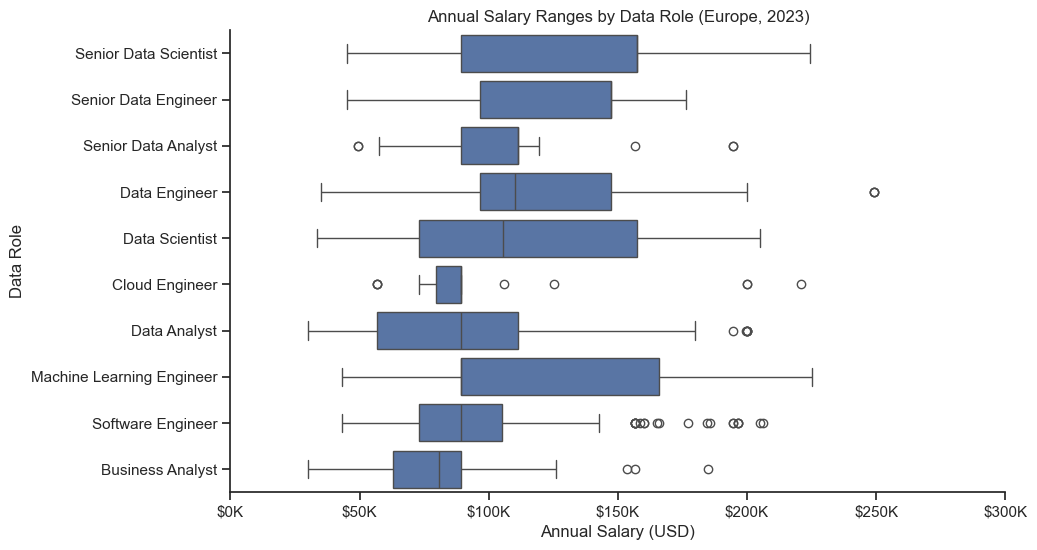

In [13]:
# Filter out entries with missing salary information and prepare salary data
salary_df = europe_jobs_df.dropna(subset=["salary_year_avg"]).copy()

job_titles_list = salary_df["job_title_short"].value_counts().index[:TOP_JOB_ROLES].tolist()
salary_job_df = salary_df[salary_df["job_title_short"].isin(job_titles_list)]

ordered_job_titles = (
    salary_job_df.groupby("job_title_short")["salary_year_avg"]
    .median()
    .sort_values(ascending=False)
    .index
)

plt.figure(figsize=(10, 6))
sns.set_theme(style="ticks")
sns.boxplot(
    data=salary_job_df,
    x="salary_year_avg",
    y="job_title_short",
    order=ordered_job_titles
)
sns.despine()
plt.title("Annual Salary Ranges by Data Role (Europe, 2023)")
plt.xlabel("Annual Salary (USD)")
plt.ylabel("Data Role")
plt.xlim(0, 300000)
formatter = plt.FuncFormatter(lambda value, pos: f'${int(value/1000)}K')
plt.gca().xaxis.set_major_formatter(formatter)
plt.show()

**Insights:**  
- **Varied Salary Ranges:** Entry-level roles offer modest compensation, while senior positions command significantly higher salaries with a wider range of values.  
- **Diverse role demand:** The number of listings per job title varies considerably—underscoring the broad-based need for foundational data skills alongside specialized expertise.  
- **Competitive rewards for senior professionals:** Higher median salaries and greater variability in compensation for senior roles highlight the premium placed on experience and specialized skills.

## Chapter 6: Broader Job Characteristics

This chapter examines additional aspects of job postings such as remote work, educational requirements, and salary transparency.

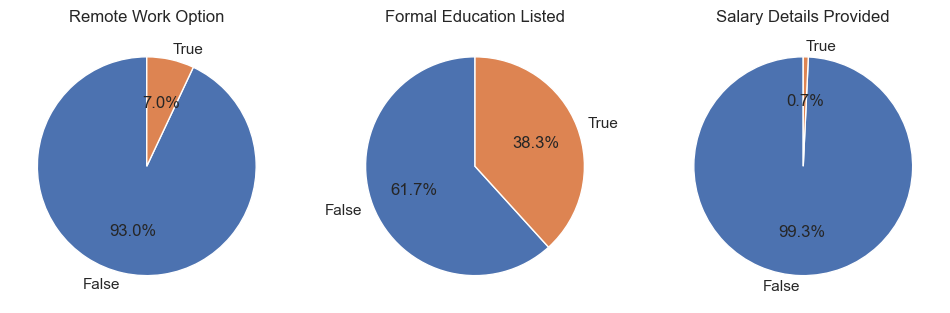

In [8]:
# Flag positions with disclosed salary information and prepare pie charts
europe_jobs_df["salary_disclosed"] = (
    europe_jobs_df["salary_year_avg"].notna() | europe_jobs_df["salary_hour_avg"].notna()
)

opportunity_labels = {
    "job_work_from_home": "Remote Work Option",
    "job_no_degree_mention": "Formal Education Listed",
    "salary_disclosed": "Salary Details Provided",
}

plot_pie_charts(europe_jobs_df, opportunity_labels)

**Insights:**  
- **Limited remote work options:** Only about 7% of job listings offer a remote work possibility, indicating a predominant preference for on-site work.  
- **Moderate degree requirements:** Approximately 38% of postings list a formal degree as a requirement, leaving about 62% available to candidates with non-traditional backgrounds.  
- **Sparse salary transparency:** Fewer than 1% of the listings include upfront salary details, which may complicate early-stage salary expectations and negotiations.

## Chapter 7: In-Depth Analysis of Data Scientist Roles

This final section focuses specifically on Data Scientist positions, offering granular insights across location, job characteristics, and employer trends.

### 7.1 Geographic Concentration of Data Scientist Roles

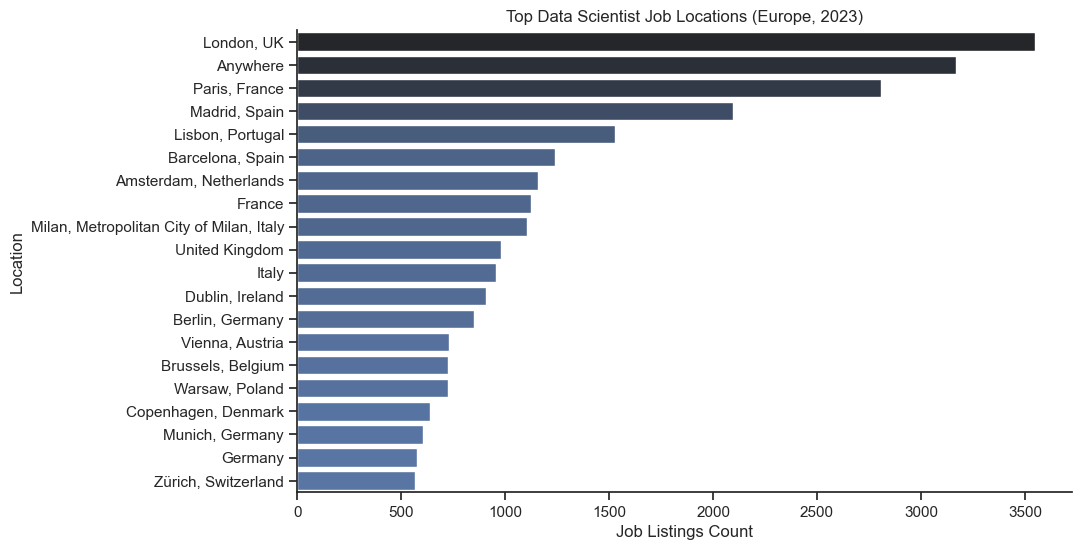

In [9]:
# Filter the dataset for Data Scientist roles and visualize job locations
ds_df = europe_jobs_df[europe_jobs_df["job_title_short"] == "Data Scientist"].copy()

location_counts_df = ds_df["job_location"].value_counts().head(TOP_N).reset_index()
location_counts_df.columns = ["location", "job_count"]

plot_bar(
    location_counts_df,
    x_col="job_count",
    y_col="location",
    title="Top Data Scientist Job Locations (Europe, 2023)",
    xlabel="Job Listings Count",
    ylabel="Location"
)

**Insights:**  
- **Urban centers lead the way:** Major cities such as London, Paris, and Madrid attract the highest concentration of data scientist positions.  
- **Remote work is emerging:** An “Anywhere” category—with several thousand listings—highlights a growing demand for location-flexible roles.  
- **Diverse geographical representation:** Beyond the top hubs, data science opportunities span a wide array of European regions, offering diverse professional environments.

### 7.2 Job Characteristics for Data Scientist Roles

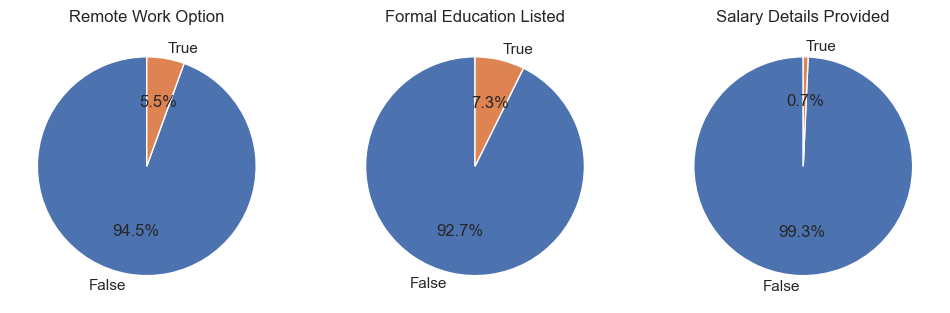

In [10]:
# Prepare pie charts specific to Data Scientist job characteristics
ds_labels = {
    "job_work_from_home": "Remote Work Option",
    "job_no_degree_mention": "Formal Education Listed",
    "salary_disclosed": "Salary Details Provided",
}

plot_pie_charts(ds_df, ds_labels)

**Insights:**  
- **Limited remote work offerings:** Nearly 95% of data scientist roles require on-site work, reaffirming traditional work arrangements in this segment.  
- **Emphasis on practical skills:** A significant majority of postings (around 53,000) do not mandate a formal degree, underscoring the weight given to demonstrable skills and experience over academic credentials.  
- **Scarce salary transparency:** Only a small fraction of roles provide salary details upfront, emphasizing the need for proactive compensation discussions.

### 7.3 Employer Trends in Data Scientist Hiring

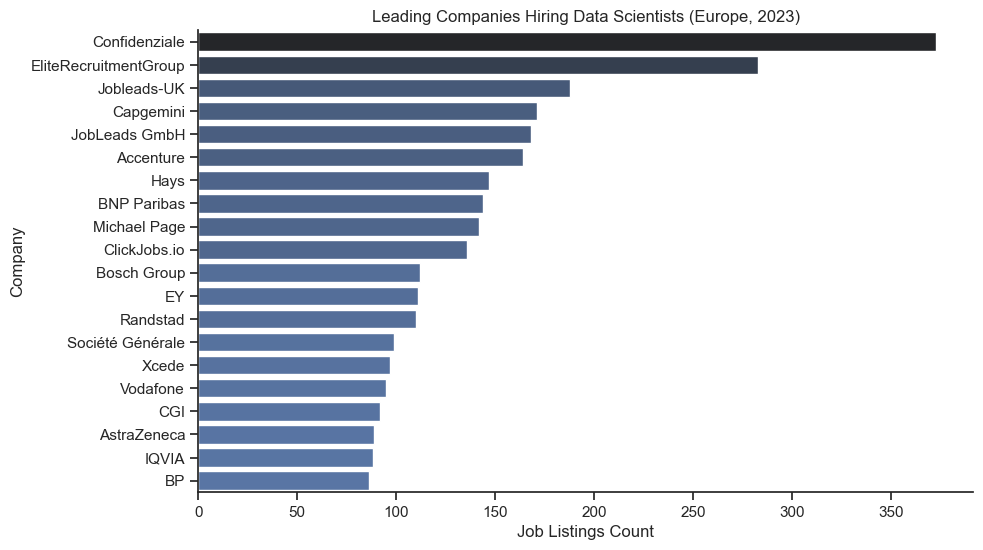

In [11]:
# Analyze the companies posting Data Scientist roles and visualize the data
ds_company_counts_df = ds_df["company_name"].value_counts().iloc[1: TOP_N + 1].reset_index()
ds_company_counts_df.columns = ["company", "job_count"]

plot_bar(
    ds_company_counts_df,
    x_col="job_count",
    y_col="company",
    title="Leading Companies Hiring Data Scientists (Europe, 2023)",
    xlabel="Job Listings Count",
    ylabel="Company"
)

**Insights:**  
- **Strong influence of recruitment channels:** Specialized agencies like *Confidenziale* and *EliteRecruitmentGroup* register significant activity, emphasizing the role recruiters play in facilitating placements.  
- **Balanced employer involvement:** Alongside recruitment agencies, established multinational companies such as *Capgemini*, *Accenture*, *BNP Paribas*, and *EY* actively post data scientist roles, indicating a diversified hiring ecosystem.

## Final Remarks

This notebook has detailed the multifaceted European data science job market in 2023. From the overall role distribution and regional distinctions to salary dynamics and role-specific trends, the insights presented here provide a strategic view of trends, skills, and opportunities. The analysis underscores not only the current state but also the emerging avenues in this competitive field.